# Final Project - PySpark

El enlace al repositorio es el siguiente: [GitHub](https://github.com/MiguelGG03/Final_Poject_PySpark.git)

Importamos la librería para hacer unas pruebas 

In [14]:
from pyspark import SparkContext
import dask.dataframe as dd

Una cosa a tener en cuenta dentro de la librería `dask.dataframe` es que cuando quieres recibir el resultado de una función o método , como puede ser la media, tienes que utilizar las mismas sentencias que en pandas, pero agregandole un `.compute()` al final.

In [19]:
df= dd.read_csv("air_traffic_data.csv", sep=",")
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


Tamaño del dataframe

In [20]:
df.size.compute()

240112

Nombre de las columnas

In [21]:
df.columns

Index(['Activity Period', 'Operating Airline', 'Operating Airline IATA Code',
       'Published Airline', 'Published Airline IATA Code', 'GEO Summary',
       'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Passenger Count', 'Adjusted Activity Type Code',
       'Adjusted Passenger Count', 'Year', 'Month'],
      dtype='object')

In [34]:
df.isna().sum().compute()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    54
Published Airline               0
Published Airline IATA Code    54
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
Adjusted Activity Type Code     0
Adjusted Passenger Count        0
Year                            0
Month                           0
dtype: int64

In [37]:
df[df["Operating Airline IATA Code"].isna()==True].compute()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
148,200508,Boeing Company,NaN,Boeing Company,NaN,Domestic,US,Deplaned,Other,Other,Other,18,Deplaned,18,2005,August
6814,201005,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,G,73,Deplaned,73,2010,May
6815,201005,Servisair,NaN,Servisair,NaN,Domestic,US,Enplaned,Low Fare,International,G,73,Enplaned,73,2010,May
6925,201006,Pacific Aviation,NaN,Pacific Aviation,NaN,International,Europe,Deplaned,Other,International,A,160,Deplaned,160,2010,June
6926,201006,Pacific Aviation,NaN,Pacific Aviation,NaN,International,Europe,Enplaned,Other,International,A,160,Enplaned,160,2010,June
7173,201008,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,G,118,Deplaned,118,2010,August
7174,201008,Servisair,NaN,Servisair,NaN,Domestic,US,Enplaned,Low Fare,International,G,118,Enplaned,118,2010,August
7747,201101,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,A,40,Deplaned,40,2011,January
7748,201101,Servisair,NaN,Servisair,NaN,Domestic,US,Enplaned,Low Fare,International,A,40,Enplaned,40,2011,January
7972,201103,Servisair,NaN,Servisair,NaN,Domestic,US,Deplaned,Low Fare,International,A,64,Deplaned,64,2011,March


Voy a informarme de lo que es el IATA code para saber si es relevante o elimino los datos

Voy a intentar hacer una diagrama de correlación para saber un poco la relacion que tienen unos datoss con otros

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

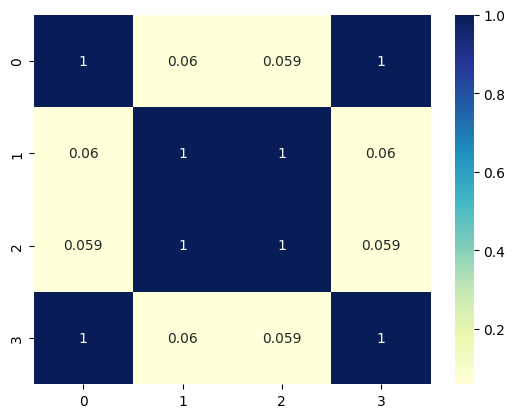

In [23]:
corr = df.corr()
sns.heatmap(corr, cmap="YlGnBu", annot = True)
plt.show()

Este no me gusta nada, uso el del ironhack que estaba más claro

In [30]:
import sys as os
import dask.array as np

In [31]:
# Codigo para la matriz de correlacion

#Codigo para ver correlacion de un dataset
def print_heatmap_corr(data:dd.DataFrame, annot:bool=True, cmap:str=None, 
                       mask:bool=True, save:bool=False, title:str=None)->None:
    
    '''
        Función que recibe un dataframe y devuelve la matriz de correlación en forma de mapa de color
        
        Parameters:
        -----------
        
        data: Dataset sobre el que queremos realizar la matriz de correlación
        annot: Si queremos mostrar el valor de la correlación en la matriz, default = True
        cmap: Paleta de colores que queremos usar para nuestro heatmap
        mask: Parámetro para mostrar solo la triangular inferior de la matriz de correlación
        save: Parámetro para salvar nuestro gráfico
        title: Título que queremos que lleve nuestro gráfico
    '''
    sns.set(style='white')     # estilo blanco hace que el fondo de la matriz sea transparente

    if mask: # Si mask es True
        mascara=np.triu(np.ones_like(data.corr(), dtype=bool))   # genera una mascara para tapar valores
    else:
        mascara = None # No aplicamos máscar

    if cmap: # Si le hemos pasado una paleta de colores
        c_map = sns.color_palette(cmap, as_cmap=True)
    else:
        c_map=sns.diverging_palette(0, 10, as_cmap=True)   # paleta de colores por defecto

    plt.figure(figsize=(20,15))
    p = sns.heatmap(data.corr(), # aplica el método corr() a nuestro dataset
            mask=mascara, # aplica la mascara
            cmap=c_map, # aplica la paleta de colores
            vmax=1, # para establecer el valor máximo de valores
            center=0, # establece el centro de la paleta de colores
            square=True,
            linewidth=0.5, # para aplicar borde a los cuadros de la matriz
            cbar_kws={'shrink': 0.5}, # mostrar leyenda de colores
            annot=annot # mostrar valores de la matriz
           )
    p.set_title(title, fontsize=20)
    
    if save:
        try:
            plt.savefig(f'graphics/{title}.png')
        except:
            destino = input('No exite la carpeta de destino, introduce un nombre para la carpeta de destino: ')
            os.mkdir(destino)
            plt.savefig(f'{destino}/{title}.png')
    
    plt.show();

In [32]:
print_heatmap_corr(df, title='Matriz de correlación datos tráfico aéreo')

ValueError: An error occurred while calling the arange method registered to the numpy backend.
Original Message: cannot convert float NaN to integer